In [31]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Maximum number of actions per training episode
max_actions = 100 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# Start coding here
# Feel free to add as many cells as you want
#0: Move south (down)
#1: Move north (up)
#2: Move east (right)
#3: Move west (left)
#4: Pickup passenger
#5: Drop off passenger

#frames for simulate agent states 
frames=[]

#know how much actions will be the agent do and how much rewards will he gain
episode_total_reward = 0
actions=0

#update frame after every action
def render_policy(policy,state): 
    global episode_total_reward
    global actions
    episode_total_reward = 0
    actions=0
    terminated=False
    frames.append(env.render())
    while not terminated :
        action=policy[state]
        next_state,reward,terminated,truncated, info=env.step(action)
        state=next_state
        frames.append(env.render())
        
        episode_total_reward+=reward
        actions+=1
        
        
    print(f"rewards per episode ={episode_total_reward}")    
    print(f"actions per episode ={actions}") 
    

In [33]:
num_actions=env.action_space.n
num_states=env.observation_space.n
num_episods=2000

#parameters for Q-learning
alpha=0.1
gamma=0.99
q_table=np.zeros((num_states,num_actions))

epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001

In [34]:
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

In [35]:
def update_q_table(state,action,reward,new_state):
    old_value=max(q_table[new_state])
    q_table[state,action]=(1-alpha)*old_value+alpha*(reward+gamma*q_table[new_state,action])

In [36]:
#update q_table in each episode

episode_returns=[]

for episode in range (num_episods):
    state,info=env.reset()
    terminated=False
    actions_count=0
    episode_reward=0
    while not terminated and actions_count<max_actions:
        action=epsilon_greedy(state)
        new_state,reward,terminated,_,_=env.step(action)
        update_q_table(state,action,reward,new_state)
        episode_reward+=reward
        state=new_state
        actions_count+=1
        
    episode_returns.append(episode_reward)   
    epsilon = max(min_epsilon, epsilon*epsilon_decay)
    

In [37]:
def get_policy():
    return {state:np.argmax(q_table[state]) for state in range (num_states)}
#after this episodes and from the q_table we will able to get the optimal policy with max reawards and less actions

In [38]:
#get the optimal policy
policy=get_policy()

rewards per episode =8
actions per episode =13


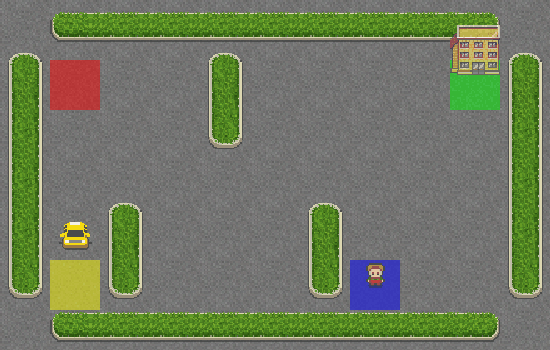

In [39]:
#begining with a rondom state and updating frames list 
state, info = env.reset() 
render_policy(policy,state)

#simulation
import imageio
from IPython.display import Image, display


imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
display(Image(filename=gif_path))